In [1]:
import pandas as pd 
import tensorflow as tf 
import numpy as np 
import math as m
from matplotlib import pyplot as plt 

In [2]:
#math constants 
pi = 3.14159265359 
g = 9.81

In [3]:
#wheel velocity 

rpm = 3400
W = (rpm/60) * 2 * pi
r = 0.09
v0 = W * r * 0.5 
print(v0)

16.022122533309


In [4]:
#tennisbal constants

C = 0.5
rho = 1.292
A = 0.003316625

cor = 0.66666
cof = 0.72

In [5]:
#launcher constants

theta = 10*pi/180
s0 = 1

In [6]:
#velocity

v0x = v0 * m.cos(theta)
v0y = v0 * m.sin(theta)
print(v0x,v0y)


15.77871049051427 2.78221238026555


In [7]:
#time 

t = 0
tf = 2.0*v0/g
dt = tf/2000

In [8]:
i = 0 
x = []
y = []
while t < tf:
    t = t + dt

    if s0 + v0y*t - 0.5*g*t**2 >= 0: 
        v0x = v0x - 0.4 * C * rho * A * v0x
        vx = v0x - 0.4 * C * rho * A * v0x
        vy = v0y - g * t
        x.append(v0x*t)
        y.append( s0 + v0y*t - 0.5*g*t**2) 
        print(x[i],y[i],i)
        i = i + 1

v0x2 = vx * cof
v0y2 = -vy * cor

xref = x[i - 1]
t = 0 
tf = 2.0*v0/g
dt = tf/2000

while t < tf:
    t = t + dt 
    if  v0y2*t - 0.5*g*t**2 >= 0: 
        v0x2 = v0x2 - 0.4 * C * rho * A * v0x2
        vx = v0x2 - 0.4 * C * rho * A * v0x2
        vy = v0y2 - g * t
        x.append(v0x2*t + xref)
        y.append( v0y2*t - 0.5*g*t**2) 
        #print(x[i],y[i])
        i = i + 1 


0.025748396743117352 1.0045309473460822 0
0.05145265991541798 1.0090357266584775 1
0.07711284625165976 1.0135143379371852 2
0.10272901242177046 1.0179667811822055 3
0.12830121503091713 1.0223930563935388 4
0.1538295106195756 1.0267931635711847 5
0.17931395566359962 1.0311671027151432 6
0.20475460657429032 1.0355148738254145 7
0.23015151969846515 1.0398364769019985 8
0.25550475131852707 1.044131911944895 9
0.2808143576525337 1.0484011789541046 10
0.306080394854266 1.0526442779296266 11
0.3313029190132975 1.0568612088714613 12
0.3564819861550626 1.0610519717796087 13
0.38161765224092586 1.0652165666540692 14
0.40670997316825036 1.0693549934948419 15
0.43175900477046636 1.0734672523019275 16
0.4567648028171399 1.077553343075326 17
0.4817274230140411 1.0816132658150368 18
0.5066469210032126 1.0856470205210607 19
0.5315233523630382 1.0896546071933972 20
0.5563567726083104 1.093636025832046 21
0.5811472371902994 1.097591276437008 22
0.6058948014968204 1.1015203590082827 23
0.6305995208523024

12.010521298136583
3.268121018262055


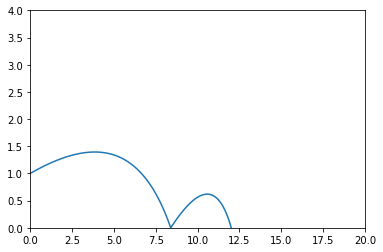

In [9]:
print(x[i-1])
print(t)
plt.plot(x,y)
plt.xlim(0, 20)
plt.ylim(0, 4)
plt.show()

In [10]:
df = pd.DataFrame(list(zip(x,y)),
        columns = ['xdata','ydata'])
print(df)

         xdata     ydata
0     0.025748  1.004531
1     0.051453  1.009036
2     0.077113  1.013514
3     0.102729  1.017967
4     0.128301  1.022393
..         ...       ...
930  11.989570  0.023298
931  11.994825  0.017700
932  12.000069  0.012075
933  12.005301  0.006425
934  12.010521  0.000748

[935 rows x 2 columns]
